In [1]:
import cv2
import numpy as np
from dataPath import DATA_PATH

In [2]:
lowThreshold = 50
highThreshold = 100

maxThreshold = 1000

apertureSizes = [3, 5, 7]
maxapertureIndex = 2
apertureIndex = 0

blurAmount = 0
maxBlurAmount = 20

In [3]:
# Display images
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Function for all trackbar calls
def applyCanny():
    # Blur the image before edge detection
    if(blurAmount > 0):
        blurredSrc = cv2.GaussianBlur(src, 
                        (2 * blurAmount + 1, 2 * blurAmount + 1), 0);
    else:
        blurredSrc = src.copy()

    # Canny requires aperture size to be odd
    apertureSize = apertureSizes[apertureIndex];

    # Apply canny to detect the images
    edges = cv2.Canny( blurredSrc, 
                        lowThreshold, 
                        highThreshold, 
                        apertureSize = apertureSize )
    plt.imshow(edges[...,::-1])

In [5]:
# Function to update low threshold value
def updateLowThreshold( *args ):
    global lowThreshold
    lowThreshold = args[0]
    applyCanny()
    pass

In [6]:
# Function to update high threshold value
def updateHighThreshold( *args ):
    global highThreshold
    highThreshold = args[0]
    applyCanny()
    pass

In [7]:
# Function to update blur amount
def updateBlurAmount( *args ):
    global blurAmount
    blurAmount = args[0]
    applyCanny()
    pass

In [8]:
# Function to update aperture index
def updateApertureIndex( *args ):
    global apertureIndex
    apertureIndex = args[0]
    applyCanny()
    pass

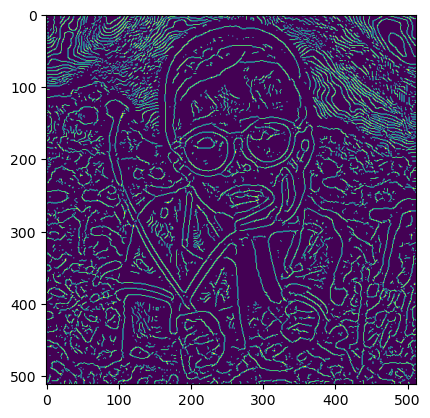

In [10]:
# Read sample image
src = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)

edges = src.copy()
# Display images
cv2.namedWindow("Edges", cv2.WINDOW_AUTOSIZE)
cv2.imshow("Edges", src)
# Trackbar to control the low threshold
cv2.createTrackbar( "Low Threshold", "Edges", lowThreshold,
            maxThreshold, updateLowThreshold)
  
# Trackbar to control the high threshold
cv2.createTrackbar( "High Threshold", "Edges", highThreshold,
            maxThreshold, updateHighThreshold)
  
# Trackbar to control the aperture size
cv2.createTrackbar( "aperture Size", "Edges", apertureIndex,
            maxapertureIndex, updateApertureIndex)
  
# Trackbar to control the blur
cv2.createTrackbar( "Blur", "Edges", blurAmount, maxBlurAmount,
            updateBlurAmount)
k = cv2.waitKey(0)

if k == 27:
    cv2.destroyAllWindows()